In [1]:
# OG jawn = https://github.com/franciscojavierarceo/Python/blob/master/Step%20Functions.ipynb

%load_ext autoreload
%autoreload 2
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [5]:
import math
import seaborn
import itertools 
import numpy as np
import pandas as pd

import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Activation
from keras.regularizers import l2, activity_l2

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from matplotlib import cm
%matplotlib inline

# Generating synthetic data from a step function in two variables

In [3]:
x1 = np.arange(-100,100)
x2 = np.arange(-100,100)
xs = np.asarray(list(itertools.product(x1,x2)))
ys = np.zeros( (len(xs),))

# This defines our function (i.e., f(x) = y)
clist = [-75, -50, -25, 25, 50, 75]
olist = [10, 25, 50, 75, 100]
for c, o in zip(clist, olist):
    flt = (xs[:,0]> c) & (xs[:,1] > c)
    ys[np.where(flt),] = o

# Plotting the true step function

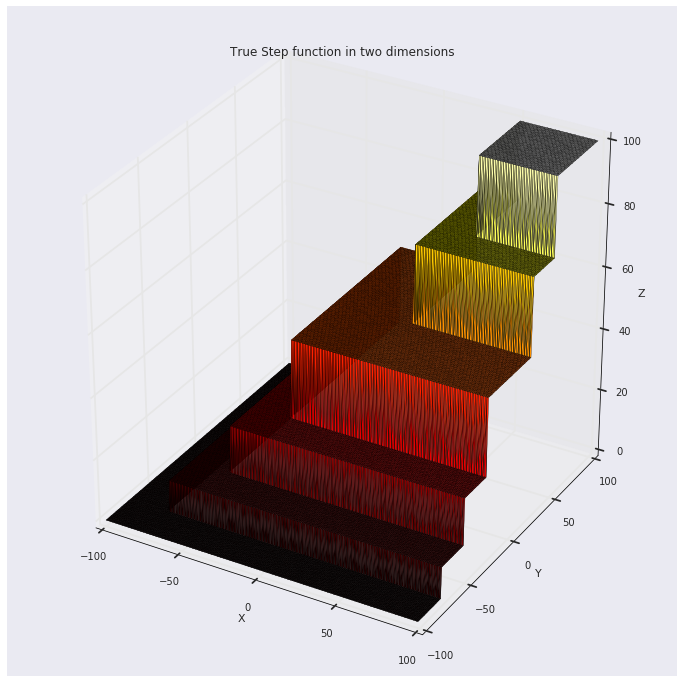

In [4]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(xs[:,0], xs[:,1], ys, cmap=cm.hot)
ax.set_title('True Step function in two dimensions')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Learning a GBM

In [8]:
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.5, random_state=420)

estimator = GradientBoostingRegressor(
    n_estimators=1000,
    max_features='auto',
    random_state=420,
    verbose=1,
    learning_rate=0.01
)
estimator.fit(X_train, y_train)
yprd_tst = estimator.predict(X_test)
err = yprd_tst - y_test

      Iter       Train Loss   Remaining Time 
         1         841.9310           11.49s
         2         827.1773           11.20s
         3         812.7162           10.73s
         4         798.5268           10.48s
         5         784.6190           10.21s
         6         770.9721           10.09s
         7         757.5959            9.85s
         8         744.4704            9.62s
         9         731.6053            9.44s
        10         718.9811            9.25s
        20         605.3967            7.94s
        30         511.8373            7.26s
        40         434.7026            6.87s
        50         371.0179            6.62s
        60         318.3076            6.44s
        70         274.5766            6.32s
        80         235.5118            6.20s
        90         198.9897            6.11s
       100         169.2171            6.02s
       200          38.0229            5.17s
       300          14.6204            4.45s
       40

# Learning a NN with a different activation function

In [ ]:
nhidden = 10
n_neurons = 200
model = Sequential()

afunc = 'tanh'
# Initial layer
model.add(Dense(n_neurons, input_dim=2, activation=afunc))

# Creating nhidden number of layers 
for i in range(nhidden):
    model.add(Dense(n_neurons, activation=afunc, W_regularizer=l2(0.01),
                    activity_regularizer=activity_l2(0.01)))

model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, pd.get_dummies(y_train).values,
          nb_epoch=200, batch_size=50,
          validation_data=(X_test, pd.get_dummies(y_test).values),
          callbacks=[early_stopping], 
          verbose=1)

yprd_tstnn = model.predict(X_test).argmax(axis=1)
olist_d = dict(zip(range(1, 6), olist))
yprd_tstnn = [olist_d.get(yi, 0) for yi in yprd_tstnn]
errnn = yprd_tstnn - y_test

In [8]:
rmse_gbm = np.sqrt( ((yprd_tst - y_test)**2).sum())
rmse_nns = np.sqrt( ((yprd_tstnn - y_test)**2).sum())

print("The RMSE of the GBM is %0.3f" % rmse_gbm)
print("The RMSE of the NN is %0.3f" % rmse_nns)

print("The GBM/NN RMSE = %0.3f" % (rmse_gbm / rmse_nns) )

The RMSE of the GBM is 22.081
The RMSE of the NN is 626.877
The GBM/NN RMSE = 0.035


# Learning the NN

In [ ]:
nhidden = 10
n_neurons = 200
model = Sequential()

# Initial layer
model.add(Dense(n_neurons, input_dim=2, activation='relu'))

# Creating nhidden number of layers 
for i in range(nhidden):
    model.add(Dense(n_neurons, activation='relu', W_regularizer=l2(0.01),
                    activity_regularizer=activity_l2(0.01)))

model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, y_train,
          nb_epoch=200, batch_size=50,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping])

yprd_tstnn = model.predict(X_test)[:,0]
errnn = yprd_tstnn - y_test

# Plotting the learned function and the residuals in 3d


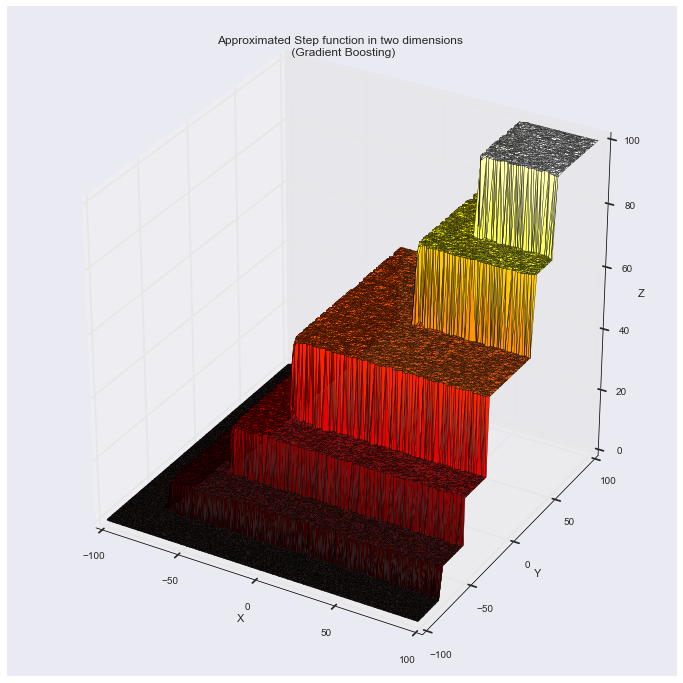

In [26]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(X_test[:,0], X_test[:,1], yprd_tst, cmap=cm.hot)
ax.set_title('Approximated Step function in two dimensions \n (Gradient Boosting)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [25]:
rmse_gbm = np.sqrt( ((yprd_tst - y_test)**2).sum())
rmse_nns = np.sqrt( ((yprd_tstnn - y_test)**2).sum())

print("The RMSE of the GBM is %0.3f" % rmse_gbm)
print("The RMSE of the NN is %0.3f" % rmse_nns)

print("The GBM/NN RMSE = %0.3f" % (rmse_gbm / rmse_nns) )

The RMSE of the GBM is 22.081
The RMSE of the NN is 548.118
The GBM/NN RMSE = 0.040


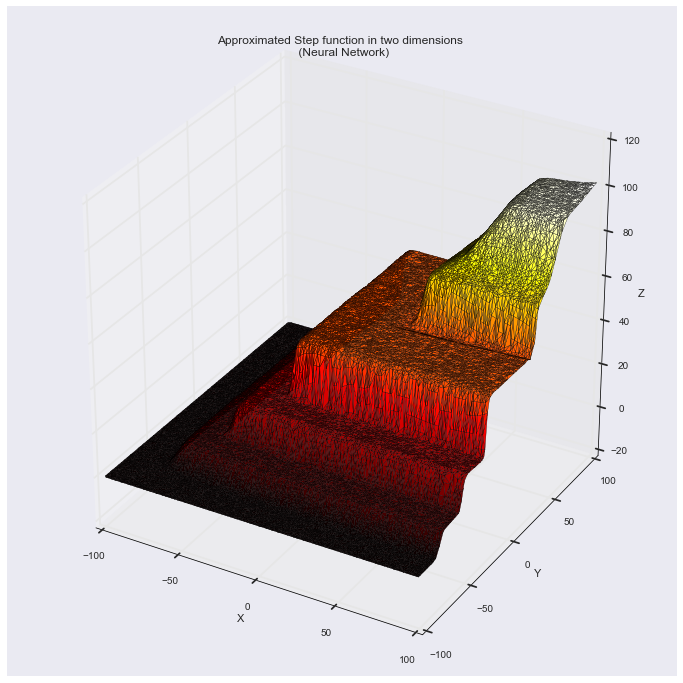

In [18]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(X_test[:,0], X_test[:,1], yprd_tstnn, cmap=cm.hot)
ax.set_title('Approximated Step function in two dimensions \n (Neural Network)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

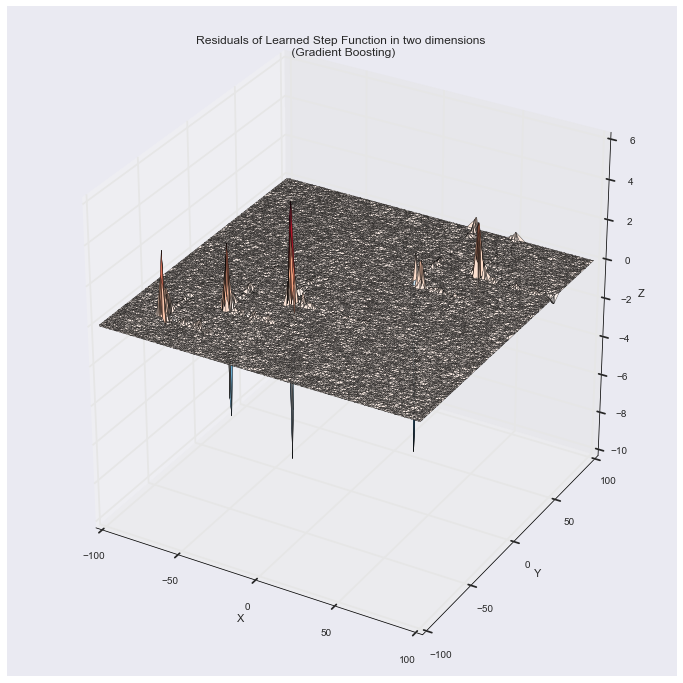

In [28]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(X_test[:,0], X_test[:,1], err, cmap=cm.RdBu_r)
ax.set_title('Residuals of Learned Step Function in two dimensions \n (Gradient Boosting)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

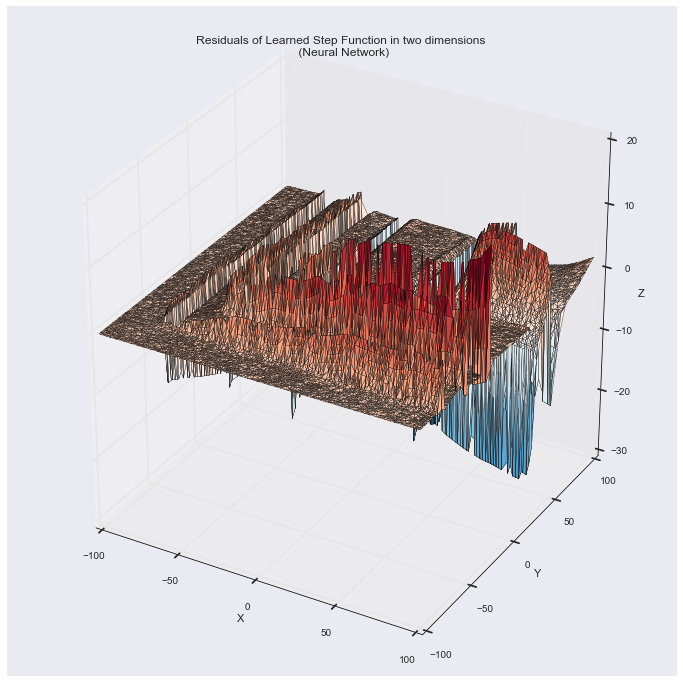

In [19]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(X_test[:,0], X_test[:,1], errnn, cmap=cm.RdBu_r)
ax.set_title('Residuals of Learned Step Function in two dimensions \n (Neural Network)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()